#                                      EDA on Facebook Data

<img src ='https://raw.githubusercontent.com/PriyankaGPawar/Term1_Project/master/Fb_webVsMobile.jpg' width="750" height="250">
**Project submitted by Priyanka Pawar**

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
4. [Data Profiling](#section4)
    - 4.1 [Understanding the Dataset](#section401)<br/>
    - 4.2 [Pre-Profiling](#section402)<br/>
    - 4.3 [Preprocessing](#section403)<br/>
    - 4.4 [Post-Profiling](#section404)<br/>

5. [Exploratory Data Analysis](#section5)<br>
    - 5.1 [Proportion of users by Gender](#section501)<br/>
    - 5.2 [Distribution of users by Age group](#section502)<br/>
    - 5.3 [Distribution of users by gender and Age group](#section503)<br/>
    - 5.4 [Distribution of Users by Tenure_group and by Gender](#section504)<br/>
    - 5.5 [Friend Counts and Likes received Age-group wise](#section505)<br/>
    - 5.6 [Trend between friend_count and likes given](#section506)<br/>
    - 5.7 [Trend between friend counts and likes_received](#section507)<br/>
    - 5.8 [Friendships_initiated Vs Gender](#section508)<br/>
    - 5.9 [Users with maximum likes per day](#section509)<br/>
    - 5.10 [Trend between mobile_likes_received & www_likes_received](#section510)<br/>
    
6. [Insights through Questions](#section6)
    - 6.1 [Which is the most popular medium - Mobile and Web](#section601)<br/>
    - 6.2 [Who are top 10 users based on maximum friend requests initiated](#section602)<br/>
    - 6.3 [Display the top 10 users who has maximum facebook friends](#section603)<br/>
    - 6.4 [Display the top 10 users who has highest likes_received](#section604)<br/>
    - 6.5 [Display the top 10 users who has highest likes_received per day](#section605)<br/>
    - 6.6 [Find the top users who has highest likes_received per day and friend counts](#section606)<br/>
    
7. [Conclusion](#section7)
    - 7.1 [Actionable Insights](#section701)<br/>



<a id=section1></a> 
## 1. Problem Statement

**Facebook** is the most widely used **social media platform** in the world, with over **2.4 billion monthly active users.**  While the site was originally created to connect individuals with similar interests, today, businesses, non-profit organizations & communities, and public figures all use the site for **network connections, information sharing** and **even marketing of products & services.**

This project is carried out to analyze the randomly collected data of around 99000 facebook user profiles.

In this  case study, **Exploratory Data Analysis(EDA)** will be employed to **analyse and find patterns about gender-based and age group-wise** affiliations **towards Facebook** as social networking site. 

It includes **data cleansing**, **combining**,**reshaping**, and __transforming__ data to finding a correlation between parameters and deriving useful insights about data.


<img src ='https://raw.githubusercontent.com/PriyankaGPawar/Term1_Project/master/facebook_NW.jpg' width="650" height="220">



<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plot

In [3]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

ERROR: Exception:
Traceback (most recent call last):
  File "E:\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 360, in _error_catcher
    yield
  File "E:\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 442, in read
    data = self._fp.read(amt)
  File "E:\Anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "E:\Anaconda3\lib\http\client.py", line 447, in read
    n = self.readinto(b)
  File "E:\Anaconda3\lib\http\client.py", line 491, in readinto
    n = self.fp.readinto(b)
  File "E:\Anaconda3\lib\socket.py", line 589, in readinto
    return self._sock.recv_into(b)
  File "E:\Anaconda3\lib\ssl.py", line 1052, in recv_into
    return self.read(nbytes, buffer)
  File "E:\Anaconda3\lib\ssl.py", line 911, in read
    return self._sslobj.read(len, buffer)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host

During handling of the a

In [5]:
import pandas_profiling

<a id=section3></a>
## 3. Loading Data

Import the source data on which we will do exploratory data analysis

In [8]:
Fb_data= pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/facebook_data.csv')

Fb_data.head()                           # to check the top 5 records from dataset

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


<a id=section4></a>
## 4. Data Profiling

- In this section we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- We will perform __pandas profiling again__ to see if the errors in the data have been fixed through preprocessing

<a id=section401></a>
### 4.1 Understanding the Dataset

Before proceeding with data profiling, we will check the few records and data across all the columns and collect the basic information about dataset.

In [9]:
Fb_data.info()                          # to check the columns, datatypes, file size and number of records in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


- ```info``` function helps understand following details about Fb_data dataframe -

  - There are a total of **99002 samples (rows)** and **15 columns** in the dataframe.
  
  - There are **14 columns** with a **numeric** datatype and **1 column** with an **object** datatype
  
  - There are **0 missing** values in the data.


<img src ='https://raw.githubusercontent.com/PriyankaGPawar/Term1_Project/master/Facebook_likes.png' width="400" height="200">


In [43]:
Fb_data.sample(10)                       # display random 10 sample records from dataset

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,tenure_group
33913,1379174,23,14,1990,6,male,160.0,46,12,5,6,5,5,0,1,18-24,0-1
54393,1316805,18,8,1995,9,female,471.0,98,39,0,0,0,0,0,0,11-17,1-2
27697,1276219,14,20,1999,10,male,13.0,36,23,0,1,0,1,0,0,11-17,0-1
83380,1577618,21,31,1992,8,female,463.0,314,105,7,5,7,4,0,1,18-24,1-2
81776,1407350,28,15,1985,8,male,574.0,281,231,128,22,128,22,0,0,25-34,1-2
21084,1095947,41,28,1972,1,male,216.0,25,13,79,77,78,71,1,6,35-44,0-1
66907,1955608,41,1,1972,1,male,629.0,153,87,72,58,72,50,0,8,35-44,1-2
1675,1829471,74,14,1939,12,male,541.0,0,0,0,0,0,0,0,0,60-74,1-2
57237,1796774,27,22,1986,2,female,315.0,110,35,0,0,0,0,0,0,25-34,0-1
6796,1311847,43,13,1970,10,male,396.0,5,3,0,0,0,0,0,0,35-44,1-2


In [9]:
Fb_data.isnull().sum()                  # to check if there are nulls in any column

userid                   0  
age                      0  
dob_day                  0  
dob_year                 0  
dob_month                0  
gender                   175
tenure                   2  
friend_count             0  
friendships_initiated    0  
likes                    0  
likes_received           0  
mobile_likes             0  
mobile_likes_received    0  
www_likes                0  
www_likes_received       0  
dtype: int64

In [10]:
Fb_data['gender'].unique()               # to get unique values in gender

array(['male', 'female', nan], dtype=object)

Above output shows that __gender__ and __tenure__ column has __NULLs.__ We will deal with them in processing part

In [11]:
Fb_data.describe()                       # to collect the descriptive stats on all numeric columns

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


- ```describe``` function gives us the following insights into the data -
    - __age__ values are **positively skewed** because **mean value(37.28)** is higher than the **median age (28)**
    - The distribution of __friend_count__ is **negatively skewed** because **mean(196.35)** is towards left side of **median  (82)** on a distribution plot
    - __tenure__ column has 2 null values as count of records indicates (99001 as opposed to 99003)
    - __likes__,__likes_received__ and other likes related columns show the __outliers__ as there is huge difference in the max value and the median values
    - __www_likes__ column has median=0, meaning 50% of the records has __0 web likes__

<a id=section402></a>
### 4.2 Pre-Profiling

In [12]:
# Running the pandas profiling
!pip install pandas_profiling --upgrade

Requirement already up-to-date: pandas_profiling in e:\anaconda3\lib\site-packages (2.3.0)


In [13]:
profile_fb = pandas_profiling.ProfileReport(Fb_data)
profile_fb.to_file(output_file="Fb_Data_before_preprocessing.html")

### Initial observations:

- Summary of data types in this dataset:
 - <em>Object</em>: <strong>gender</strong>
 - <em>Numeric</em>: Everything else (integer)
 
- The following variables have null values that may need to addressed.
    - <strong>Gender - </strong> Tenure has 2 records with NULL value. We will replace it with the median of the column
    - <strong>Age - </strong> Age has 75 records with NULL/missing value. This can be replaced by gender columns values of adjacent rows

- <strong> Mobile_likes_received & www_likes_received - </strong> These columns have high co-relation  with likes_received, so we can ignore these columns. However, we will retain them to compare the usage of facebook through these mediums





<img src ='https://raw.githubusercontent.com/PriyankaGPawar/Term1_Project/master/facebook-sentiment-analysis.png' width="400" height="200">

 <a id=section403></a>
 ### 4.3 Preprocessing

####  1. Handling NULLs in gender column

In [10]:
Fb_data['gender'].value_counts(dropna=False)                # check the distinct user counts by gender

male      58574
female    40254
NaN       175  
Name: gender, dtype: int64

In [13]:
Fb_data['gender'] = Fb_data['gender'].ffill(axis=0)         # forward fill the values of gender into rows will NULL

In [12]:
Fb_data['gender'].value_counts(dropna=False)                # validate if the NULLs are replaced.
                                        
# Above operation (ffill) replaced 88 columns with 'male' and 87 rows with 'female' data

male      58662
female    40341
Name: gender, dtype: int64

#### 2. Handling the NULLs in tenure column

In [16]:
Fb_data['tenure']=Fb_data['tenure'].fillna(Fb_data['tenure'].mean())     # replace 2 NULLs with mean of 'tenure'

In [17]:
Fb_data['tenure'].isnull().sum()                           # validate if the NULLs are replaced.   

0

#### 3. Forming age groups for data analysis

In [18]:
Fb_data['age_group']=pd.cut(Fb_data['age'],[0,11,18,25,35,45,60,75,120],
                           labels=['1-10','11-17','18-24','25-34','35-44','45-59','60-74','75+'],include_lowest=True)

In [19]:
Fb_data.tail(10)                        # check the values of newly added column

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
98993,1654565,19,15,1994,8,male,394.0,4538,4144,4501,15088,4435,5961,66,9127,18-24
98994,2063006,20,4,1993,1,female,402.0,1988,332,7351,106025,7248,73333,103,32692,18-24
98995,1132164,20,9,1993,10,female,699.0,3611,973,4507,7768,4414,6909,93,859,18-24
98996,1668695,24,25,1989,4,female,182.0,2938,1272,6018,17765,5843,11708,175,6057,18-24
98997,1458985,28,14,1985,12,female,290.0,2218,1618,4626,10268,4290,4250,336,6018,25-34
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202,60-74
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820,11-17
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092,11-17
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756,18-24
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913,35-44


#### 4. Creating tenure groups in the form of years

In [20]:
# convert the tenure from days into years and then forming the bins on the year spend on facebook through ranges

Fb_data['tenure_group'] =pd.cut((Fb_data['tenure']/365).round(2),[0,1,2,3,4,5,6,7,8,9],
                                labels=['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9'],
                                include_lowest =True )

In [22]:
Fb_data.tail()                              # perform tail and info function to see data and information about the columns
Fb_data.info()
#Fb_data.drop('tenure_yrs',axis=1, inplace= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 17 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   99003 non-null object
tenure                   99003 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
age_group                99003 non-null category
tenure_group             99003 non-null category
dtypes: category(2), float64(1), int64(13), object(1)
memory usage: 11.5+ MB


<a id=section404></a>
## 4.4 Post-Profiling

In [23]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(Fb_data)
profile.to_file(output_file="Fb_Data_after_preprocessing.html")

__Observations after processing and re profiling:__

After preprocessing the Facebook data, we can see that missing values in the columns like age and tenure are gone. Also introducing the new columns like age-group has categorized the data into meaningful insights.

The dataset info:
- Total __Missing(%)__ =__0%__
- Number of __variables__ = __17__


### Correlation between fields of Dataset

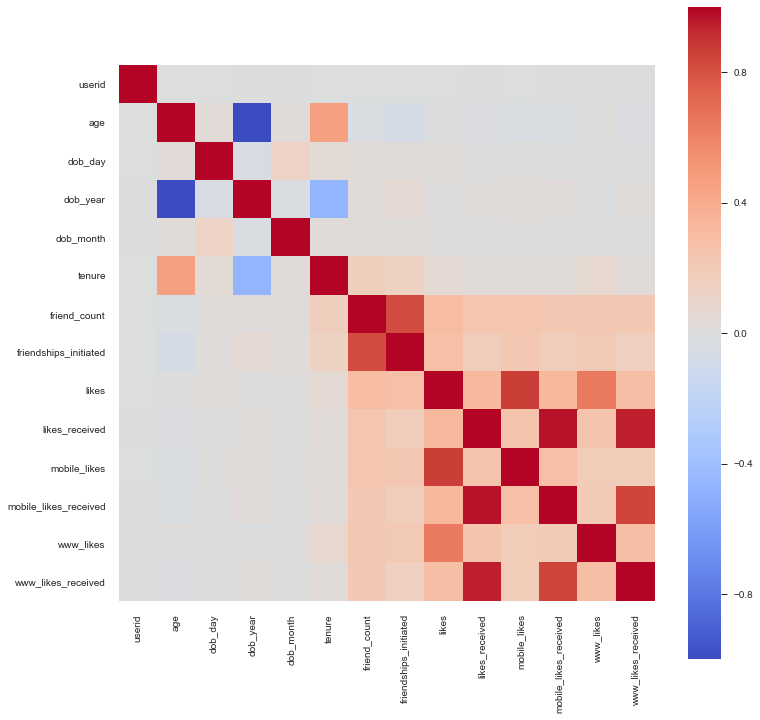

In [24]:
features_correlation = Fb_data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(features_correlation,vmax=1, square=True, annot=False,cmap='coolwarm')

### Observations -
1. __Positive corelation__ between __friend counts__ and __likes__ received or like given
2. __Userid__ doesn't have any significant correlation with other columns
3. Mild to strong co-relation between __likes_received__ and __mobile-likes-received__ and __www-likes-received__
4. __tenure__ has negative correlation with __dob_year__, which is obvious. As dob_year increases tenure or the time period for which user has had account on facebook decreases.
5. __tenure__ and __age__ has __moderately positive correlation__, which means higher the age ,higher is the time period of association with Facebook


#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<a id=section5></a>
## 5. Exploratory Data Analysis


<img src ='https://raw.githubusercontent.com/PriyankaGPawar/Term1_Project/master/facebook_graph.jpg' width="600" height="400">

<a id=section501></a>
### 5.1 Proportion of users by Gender

#### Let's find out how many users are there by each gender - through Pie chart

Text(0.5, 1.0, 'Pie chart showing the proportion of User profiles for each gender')

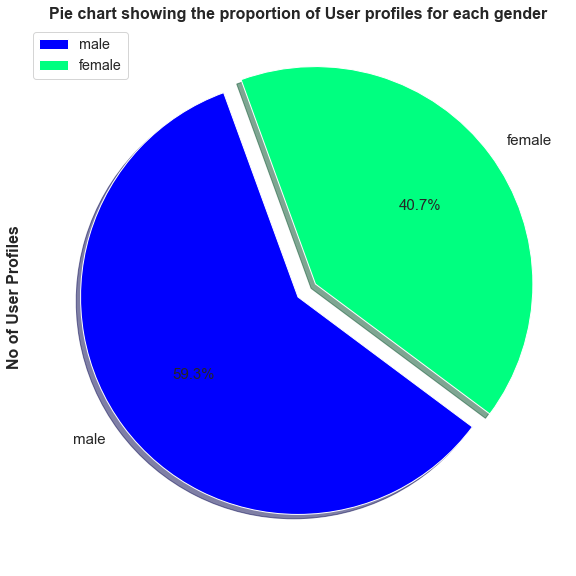

In [54]:
Fb_data['gender'].value_counts().plot(kind='pie', fontsize=15, autopct='%3.1f%%', explode=[0,0.1],
                                               figsize=(10,10), shadow=True, startangle=110, legend=True,colormap=
                                     'winter')

plt.ylabel('No of User Profiles',fontsize=16,fontweight='bold')
plt.title('Pie chart showing the proportion of User profiles for each gender',fontsize=16,fontweight='bold')


### Observation -
#### Above chart clearly indicates that there are almost 60% of male users and close to 41% of female user profiles on facebook. 
#### So it is roughly __59:41 ratio of male:female users__

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<a id=section502></a>
### 5.2 Distribution of users by Age group

In [21]:
Fb_data['age_group'].value_counts()

18-24    25735
25-34    18639
11-17    16592
45-59    13885
35-44    9325 
60-74    8347 
75+      6480 
1-10     0    
Name: age_group, dtype: int64

Text(0, 0.5, 'No of Users')

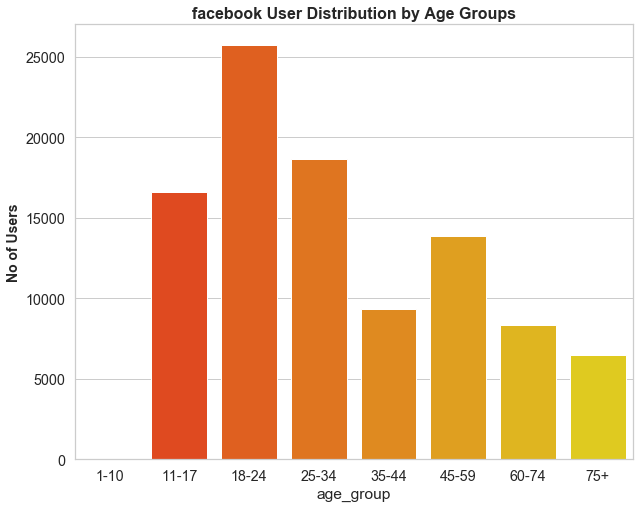

In [22]:
fig,ax =plt.subplots(figsize=(10,8))
sns.countplot(data = Fb_data,x ='age_group',palette='autumn')
plt.title('facebook User Distribution by Age Groups',fontsize=16,fontweight='bold')
plt.ylabel('No of Users',fontsize=14,fontweight='bold')

### Observations -

1. Above column chart clearly depicts that __maximum number of user base of facebook is from __18-24__ age group subsequently followed by __25-34__ and closely followed by teenagers __11-17__

2. Also the number of users __decrease sharply__ in the __mid age group __35-44__ , increases between 45-59 and then goes decreasing again in the old age.

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<a id=section503></a>
### 5.3 Distribution of users by gender and Age group

Let's visualize the distribution of facebook users by different age groups and gender.

Text(0, 0.5, 'No of Users')

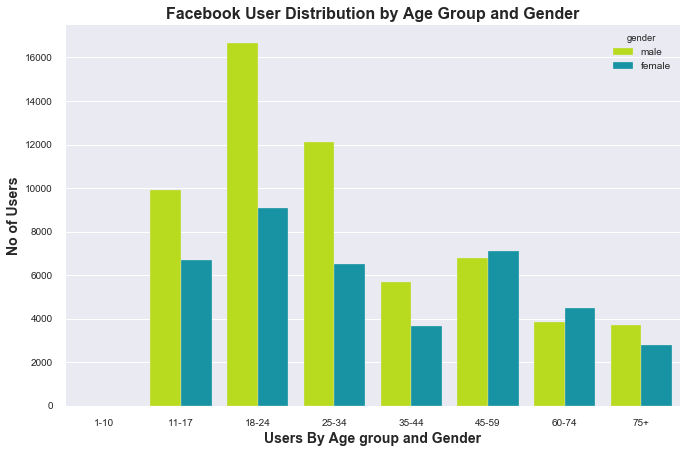

In [28]:
fig,ax =plt.subplots(figsize=(11,7))
sns.countplot(data = Fb_data,x = 'age_group', hue='gender',palette='nipy_spectral_r')
plt.title('Facebook User Distribution by Age Group and Gender',fontsize=16,fontweight='bold')
plt.xlabel('Users By Age group and Gender',fontsize=14,fontweight="bold")
plt.ylabel('No of Users',fontsize=14,fontweight='bold')


### Observations -
1. Each age group has __higher male user base than female users till age group of 35-44__. After that the __trend reverses__ and female user's strength dominate male users. 
2. Age group of 75+ people again has more male users compared to female users.
3. __Highest number of Female and Male users come from 18-24 age group category__

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


<a id=section504></a>
### 5.4 Distribution of Users by Tenure_group and by Gender

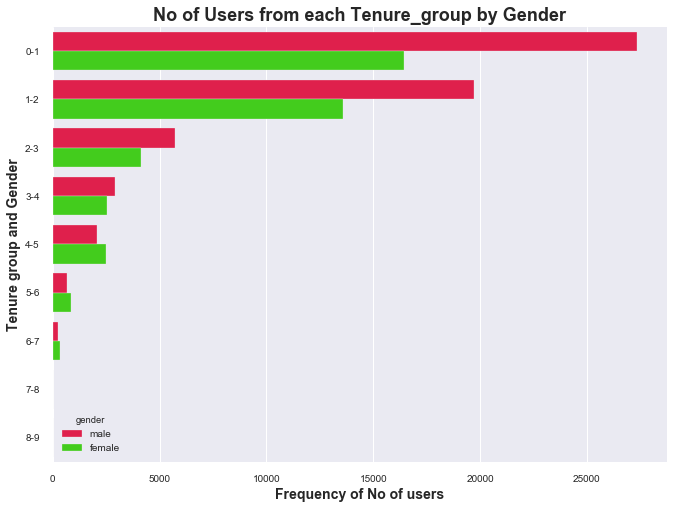

In [29]:
plt.figure(figsize=(11,8))
sns.countplot(y="tenure_group", data=Fb_data, hue='gender',palette='prism_r')

plt.title("No of Users from each Tenure_group by Gender",fontsize=18,fontweight="bold")
plt.xlabel("Frequency of No of users",fontsize=14,fontweight="bold")
plt.ylabel("Tenure group and Gender",fontsize=14,fontweight="bold")
plt.show()

### Observations:
1. Maximum tenure or period for which users stay on facebook is between 0-2 years. Later the tenure decreases meaning user base plunges significantly above 2-3 years.

   This is __one of the issues facebook need to look at - on How to make users stay with facebook longer__

2. More male users than female users in majority of tenure groups except few

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

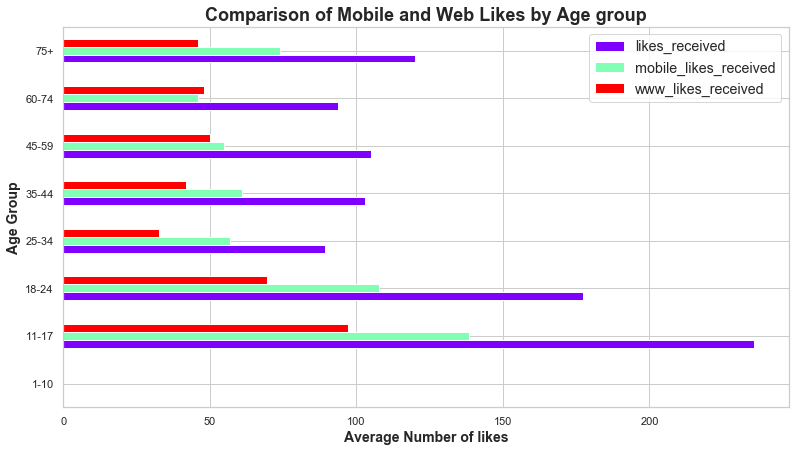

In [44]:
Fb_data.groupby(['age_group'])[['likes_received',
                                'mobile_likes_received','www_likes_received']].mean().plot(kind='barh',
                                                                                           figsize=(13, 7),
                                                                                           legend=True,fontsize=11,
                                                                                          colormap='rainbow')

plt.title("Comparison of Mobile and Web Likes by Age group",fontsize=18,fontweight="bold")
plt.xlabel("Average Number of likes",fontsize=14,fontweight="bold")
plt.ylabel("Age Group",fontsize=14,fontweight="bold")
plt.show()

<a id=section505></a>
### 5.5 Friend Counts and Likes received Age-group wise

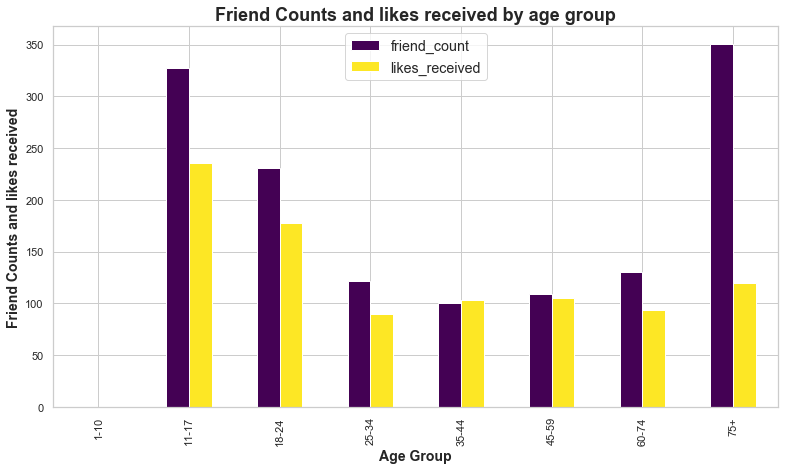

In [49]:
Fb_data.groupby(['age_group'])[['friend_count','likes_received']].mean().plot(kind='bar',
                                                                              figsize=(13, 7),
                                                                              legend=True,fontsize=11, colormap='viridis')

plt.title("Friend Counts and likes received by age group",fontsize=18,fontweight="bold")
plt.xlabel("Age Group",fontsize=14,fontweight="bold")
plt.ylabel("Friend Counts and likes received",fontsize=14,fontweight="bold")
plt.show()

### Observations
1. Average __Friend counts are highest in '11-17' and '75+' age groups__, whereas these numbers decline in the middle age groups
2. Number of likes received are higher in younger users which declines as the age increases

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<a id=section506></a>
### 5.6 Trend between friend_count and likes given

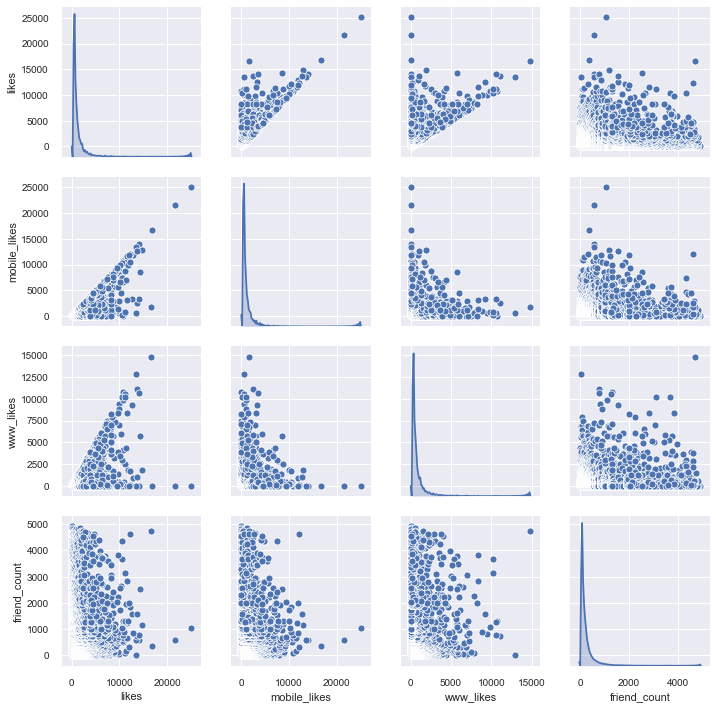

In [31]:
sns.pairplot(data=Fb_data[['likes', 'mobile_likes', 'www_likes','friend_count']], size=2.5, diag_kind='kde',palette='brown')


<a id=section507></a>
### 5.7 Trend between friend counts and likes_received

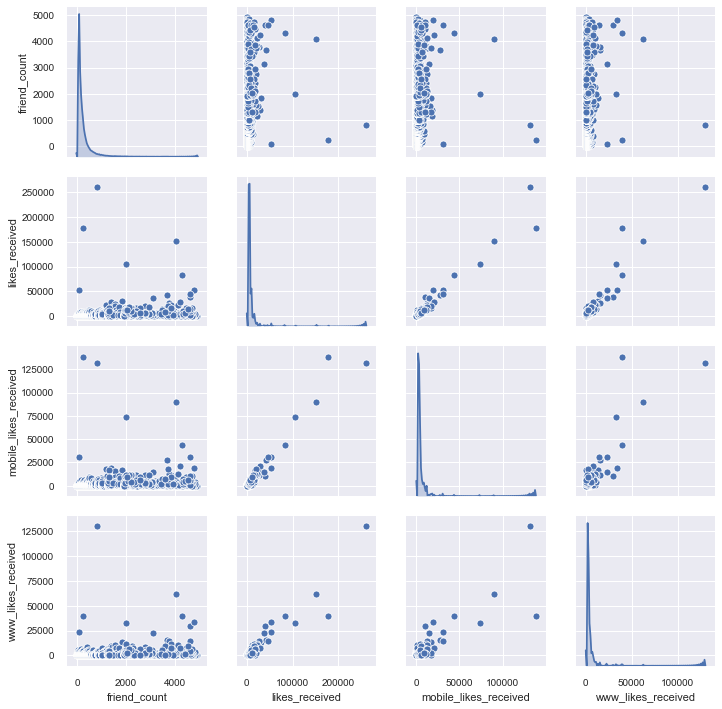

In [32]:
sns.pairplot(data=Fb_data[['friend_count','likes_received','mobile_likes_received', 'www_likes_received']], size=2.5, diag_kind='kde')

In [ ]:
sns.pairplot(data=Fb_data[['friend_count','likes_received',
 'mobile_likes_received', 'www_likes_received']], size=2.5, diag_kind='kde')


### Observations -
People with highest number of likes_received are giving away less likes to other users. and vice a versa


<a id=section508></a>
### 5.8 Friendships_initiated Vs Gender

Let's check which gender has the most tendency to initiate friend request

In [24]:
Fb_data.groupby(['gender'])['friendships_initiated'].mean()

gender
female    113.838427
male      103.060942
Name: friendships_initiated, dtype: float64

In [ ]:
Fb_data.groupby(['gender'])['friendships_initiated'].mean().plot(kind='bar', 
                                                                 legend=True,fontsize=11,width=0.3,color='purple')

plt.title("Friendships initiated by Gender",fontsize=18,fontweight="bold")
plt.xlabel("Gender",fontsize=14,fontweight="bold")
plt.ylabel("Average Friendships initiated",fontsize=14,fontweight="bold")


On average, maximum number of friendships are initiated by female users

<a id=section509></a>
### 5.9 Users with maximum likes per day

Text(0.5, 1.0, 'Maximum likes per day')

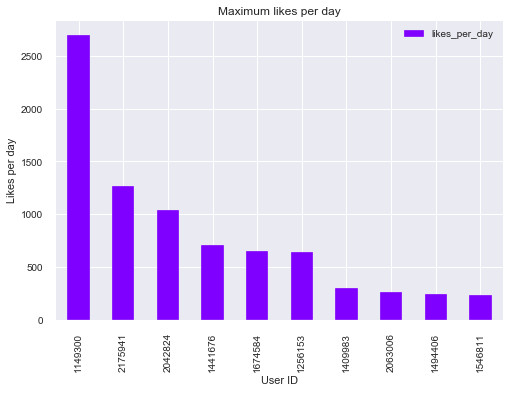

In [36]:
# likes per day

#Calculating likes per day
Fb_data['likes_per_day']=Fb_data.likes_received/Fb_data.tenure.where(Fb_data.tenure>0)
#Fb_data.tail()

f1=Fb_data.sort_values(by='likes_per_day',ascending=False)[:10]

f1.plot(x='userid',y='likes_per_day',kind='bar',legend=True,colormap='rainbow')
plt.ylabel("Likes per day")
plt.xlabel("User ID")
plt.title("Maximum likes per day")

<a id=section510></a>
### 5.10 Trend between mobile_likes_received  & www_likes_received

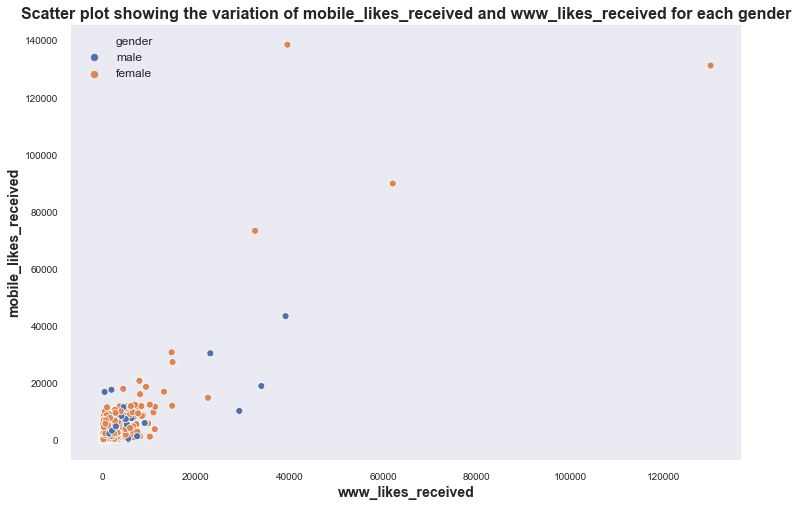

In [37]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=Fb_data, x='www_likes_received', y='mobile_likes_received',hue='gender')

plt.xlabel('www_likes_received',fontsize=14,fontweight="bold")
plt.ylabel('mobile_likes_received',fontsize=14,fontweight="bold")
plt.title('Scatter plot showing the variation of mobile_likes_received and www_likes_received for each gender',
          fontsize=16,fontweight="bold")
plt.grid(False)
plt.legend(fontsize=12)


### Observation -
Maximum abundance of likes_received is for female account holders, as we see that there is majority of orange colour in above visualization

<a id=section6></a>
## 6 Insights Through Questions

<a id=section601></a>
### 6.1 Which is the most popular medium - Mobile or Web

Let's find out whether users prefer web based interface or mobile apps to access facebook. Below graph will try to plot the comparison between different modes of accessing facebook

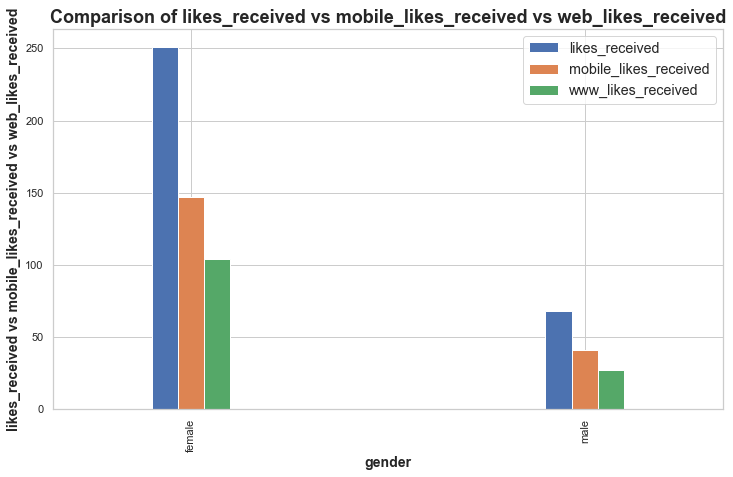

In [42]:
Fb_data.groupby(['gender'])[['likes_received','mobile_likes_received','www_likes_received']].mean().plot(width=0.2,kind='bar', figsize=(12, 7), legend=True,fontsize=11)

plt.title("Comparison of likes_received vs mobile_likes_received vs web_likes_received",fontsize=18,fontweight="bold")
plt.xlabel("gender",fontsize=14,fontweight="bold")
plt.ylabel("likes_received vs mobile_likes_received vs web_likes_received",fontsize=14,fontweight="bold")
plt.show()

Above bar chart clearly indicates that __maximum likes have been received through mobile only as compared to__ the likes received from __facebook web__ 

<a id=section602></a>
### 6.2 Who are top 10 users based on maximum friend requests initiated

#### To find out who has initiated maximum friendship requests and which gender and age group they belong to

In [39]:
Fb_data_new=Fb_data.iloc[Fb_data['friendships_initiated'].sort_values(ascending=False)[:10].index,:]
Fb_data_new[['gender','userid','friendships_initiated','age_group']]

,gender,userid,friendships_initiated,age_group
98993,male,1654565,4144,18-24
98842,female,1052695,3654,18-24
98675,female,1949247,3594,18-24
98567,female,1205425,3538,45-59
98347,male,1403953,3415,18-24
98960,female,1745067,3238,11-17
98898,female,2010847,3233,11-17
98949,female,1103175,3086,11-17
98685,male,1934087,3078,18-24
98835,male,1075221,3024,18-24


#### Observations -
The data shows interesting facts such as : 
    - **Maximum number (60%) of frienships are initiated are by female users.**
    - Highest number of friend request are sent by a male user
    - Most active People in terms of friendship initiating on facebook are teenagers and youngsters (11-17) & (18-24)

<class 'pandas.core.frame.DataFrame'>


Text(0.5, 1.0, 'Top 10 users based upon highest friendships initiated')

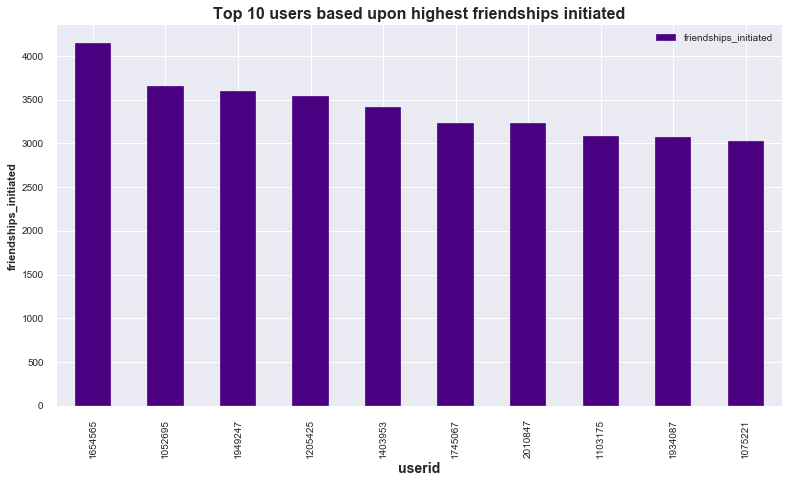

In [40]:
Fb_data_new=Fb_data.iloc[Fb_data['friendships_initiated'].sort_values(ascending=False)[:10].index,:]
print(type(Fb_data_new))

# Plotting these top 10 users through bar graph
Fb_data_new.plot(x='userid',y='friendships_initiated',kind='bar',figsize=(13,7),color='indigo') 
            
plt.xlabel('userid',fontsize=14,fontweight="bold")
plt.ylabel('friendships_initiated',fontweight="bold")
plt.title('Top 10 users based upon highest friendships initiated',fontsize=16,fontweight="bold")

<a id=section603></a>
### 6.3 Display the top 10 users who has maximum facebook friends

#### To find out who has maximum friends and which gender and age group they belong to

In [41]:
#Fb_data['likes_received'].value_counts()

fb_max_friends=Fb_data.iloc[Fb_data['friend_count'].sort_values(ascending=False)[:10].index,:]
#fb_max_friends[['userid','friend_count','gender','friendships_initiated','age_group']]

Text(0.5, 1.0, 'Users with highest No of Facebook Friends')

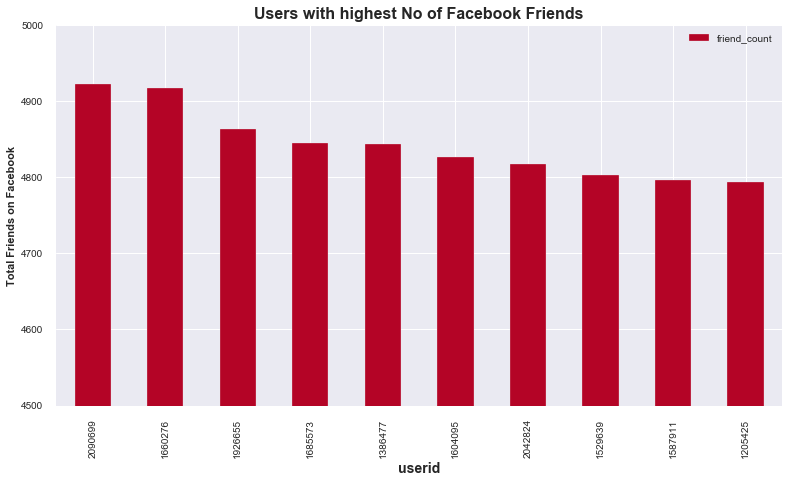

In [42]:
fb_max_friends=Fb_data.iloc[Fb_data['friend_count'].sort_values(ascending=False)[:10].index,:]
fb_max_friends.plot(x='userid',y='friend_count',kind='bar',figsize=(13,7),colormap='coolwarm_r',ylim=(4500,5000)) 
#df.plot(ylim=(0,200))

plt.xlabel('userid',fontsize=14,fontweight="bold")
plt.ylabel('Total Friends on Facebook',fontweight="bold")
plt.title('Users with highest No of Facebook Friends',fontsize=16,fontweight="bold")

**Observation - Top 10 Users with maximum friends are female user profiles**

<a id=section604></a>
### 6.4 Display the top 10 users who has highest likes_received

Text(0.5, 1.0, 'Users with highest No of likes received for facebook Posts')

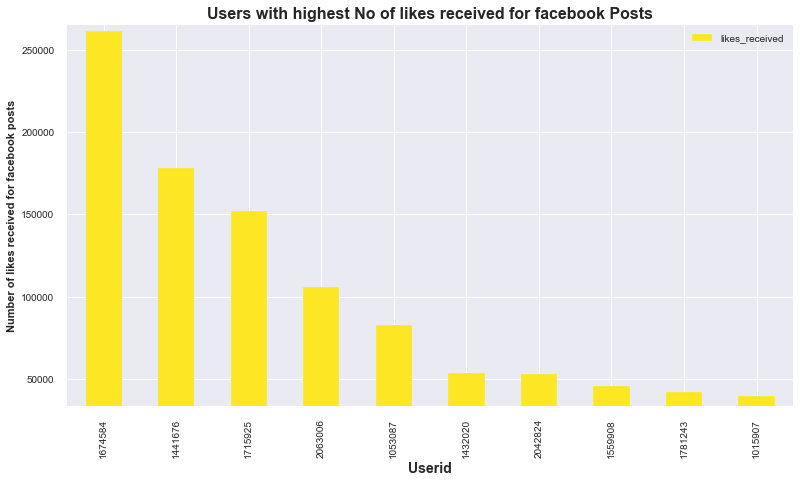

In [43]:
fb_likes_received=Fb_data.iloc[Fb_data['likes_received'].sort_values(ascending=False)[:10].index,:]
fb_likes_received.plot(x='userid',y='likes_received',kind='bar',figsize=(13,7),colormap='viridis_r',ylim=(34000,265000) )

plt.xlabel('Userid',fontsize=14,fontweight="bold")
plt.ylabel('Number of likes received for facebook posts',fontweight="bold")
plt.title('Users with highest No of likes received for facebook Posts',fontsize=16,fontweight="bold")

<a id=section605></a>
### 6.5 Display the top 10 users who has highest likes_received per day

In [40]:
fb_likes_perDay=Fb_data.iloc[Fb_data['likes_per_day'].sort_values(ascending=False)[:10].index,:]
fb_likes_perDay.plot(x='userid',y='likes_per_day',kind='bar',figsize=(11,6))


plt.xlabel('Userid',fontsize=14,fontweight="bold")
plt.ylabel('Number of Likes Received Per Day for facebook posts',fontweight="bold")
plt.title('Users with highest No of likes received Per Day for facebook Posts',fontsize=16,fontweight="bold")

KeyError: 'likes_per_day'

<a id=section606></a>
### 6.6 Find the top users who has highest likes_received per day and friend counts

Join between above 2 datasets will allow us to find out people with highest friend counts
and who at the same time receive the maximum likes

In [45]:
pd1=pd.merge(fb_likes_perDay,fb_likes_received, how='inner', on='userid')

fb_max_friends_likes= pd1[['userid','friend_count_x', 'likes_per_day_x']]
fb_max_friends_likes

,userid,friend_count_x,likes_per_day_x
0,2042824,4817,1038.509804
1,1441676,230,704.213439
2,1674584,818,651.364090
3,2063006,1988,263.743781


### 6.7 compare between likes, mobile_likes and www_likes

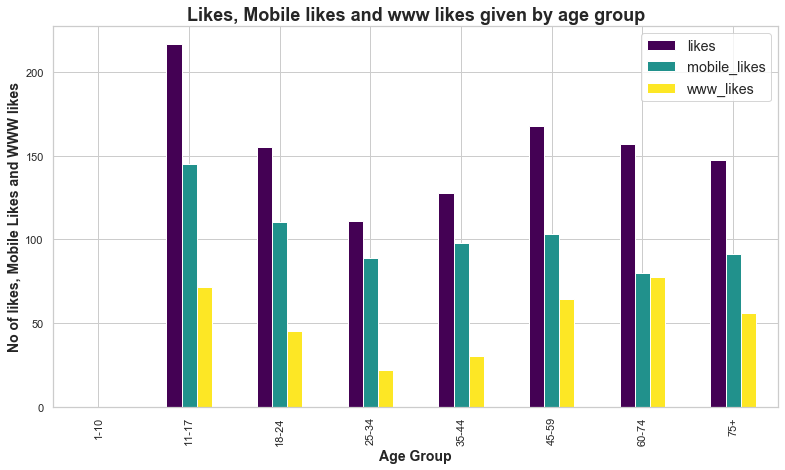

In [51]:
Fb_data.groupby(['age_group'])[['likes','mobile_likes','www_likes']].mean().plot(kind='bar',
                                                                              figsize=(13, 7),
                                                                              legend=True,fontsize=11, colormap='viridis')

plt.title("Likes, Mobile likes and www likes given by age group",fontsize=18,fontweight="bold")
plt.xlabel("Age Group",fontsize=14,fontweight="bold")
plt.ylabel("No of likes, Mobile Likes and WWW likes",fontsize=14,fontweight="bold")
plt.show()

In [52]:
Fb_data.groupby(['age_group'])[['likes','mobile_likes','www_likes']].mean()

f1= Fb_data.groupby([''])


,likes,mobile_likes,www_likes
age_group,,,
1-10,NaN,NaN,NaN
11-17,216.612042,145.032064,71.579918
18-24,155.556480,110.423353,45.133048
25-34,110.793819,88.916465,21.877354
35-44,127.900161,97.707453,30.192386
45-59,167.850342,103.163774,64.686568
60-74,157.232419,79.691386,77.541033
75+,147.256019,91.306481,55.949537


<a id=section7></a>
## 7 Conclusion

1. Overall people from the __age group of 11-17, 18-24 and 25-34__ are the most active people on the facebook platform.

2. Users who has joined the platform and spent around __0-2 years, are the most active profiles__ in terms of likes, friend requests.

3. Overall __male to female users ratio on facebook is 60:40__, meaning more men on using the facebook.

4. __Female__ users have more number of friends than Men. Also females are found among the __profiles with highest activity in terms of sending friend requests, likes giving/receiving__ 

5. On an average __Women have received more likes__ than their total friend counts. __When compared with male profiles__, females have more likes.

6. __Usage of the facebook is more on the mobile platform compared to web.__ This is proved by comparing likes_received and mobile-likes-received and www-likes-received. Also through likes, mobile_likes and www_likes

<a id=section701></a>
### 7.1 Actionable Insights 

1. __Famous and Active user__ profiles can be targetted to do the __advertising and content sharing and spreading the word and generating more profit__. 
   
2. It may also offer __earning opportunity to these users__ by making an offer to share sponsor advertisements with their friends

3. It can approach active users by sharing freebies & readymade customized collages / collection of top photos / videos, which these users can share with their friends

4. Facebook can bring in __more features in the mobile app__ and make it __user friendly__ so that lot of activities that are done through websibe become possible through app itself. 
These can include below activites -
       
        1. Less data consuming app mobile/light version
        2. Notifications about posts from friends
        3. Ease of accessibility of profiles, pages, streaming videos
        4. Easy to share content, post photos, watching videos
        5. Ease in giving likes, sharing content like photos, videos, face tagging etc. 
        
        6. Page creation for businesses 
        7. one-click calling feature for business during office-hours

